# Integrals

In [1]:
%matplotlib inline  

import numpy as np
from numpy import exp
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib import style

plt.rcParams["figure.figsize"]=(20,20) #sets the default image size
plt.rcParams["figure.dpi"]=(300)

## 5.5 Homework: 
Calculate the following integral based on three different rules

$$\int_0^3 (x^2-x+1) dx$$

$$\int_0^3 (x^4-x+1) dx$$

$$\int_0^3 \text{exp}(-x^2) dx$$

For the 1st one, how many sampling points do you need for Simpson rule?

In [2]:
f1 = lambda x: x**2-x+1
f2 = lambda x: x**4-x+1
f3 = lambda x: exp(-(x**2))

### Rectangle Rules

In [3]:
def Rectangle(func, lower=0, upper=1, divs=20, align = 'center', plot=False):
    
    # delta x
    del_x = (upper - lower)/(divs)
    # array of x=values from lower to upper, with divs+1 elements
    x_values = np.linspace(lower, upper, divs +1)
    
    # Sets the x-calulation values based on the type of appoximation set
    # in align
    if align == 'left':
        y_values = func(x_values+del_x)
    elif align == 'right':
        y_values = func(x_values)
    else:
        y_values = func(x_values +del_x/2)
        
    area = 0
    
    # calculates the y-values
    for i in range(divs):
        area+= y_values[i]*del_x
    # plots the function line versus the rectangular approximations    
    if plot:
        if divs <= 100:
            x_smooth = np.linspace(lower, upper, divs*5)
            plt.plot(x_smooth,func(x_smooth), 'r')
        else:
            plt.plot(x_values,func(x_values), 'r')
        
        if align == 'left':
            plt.bar(x_values[0:divs]+del_x/2, y_values[0:divs], width=del_x, 
                    color='blue', edgecolor='black')
        elif align == 'right':
            plt.bar(x_values[0:divs]+del_x/2, y_values[0:divs], width=del_x, 
                    color='blue', edgecolor='black')
        else:
            plt.bar(x_values[0:divs]+del_x/2, y_values[0:divs], width=del_x, 
                    color='blue', edgecolor='black')
        plt.show()
    
#     print("x array", x_values)
#     print("y array", y_values)
    
    return area

### Trapezoidal Rules

In [4]:
def Trapezoid(func, lower=0, upper=1, divs=20):
    
    # delta x
    del_x = (upper - lower)/(divs)
    # array of x=values from lower to upper, with divs+1 elements
    x_values = np.linspace(lower, upper, divs +1)
    y_values = np.zeros(divs+1)
    # calculates the y-values
    for i in range(divs+1):
        if i==0 or i==divs:
            y_values[i] = func(x_values[i])
        else:
            y_values[i] = 2*func(x_values[i])
        
    area = del_x/2*np.sum(y_values)
    
#     print("x array", x_values)
#     print("y array", y_values)
    
    return area

### Simpson's rule

In [5]:
def Simpsons(func, lower=0, upper=1, n=20):
    
    if n%2 == 1:
        n +=1
        # delta x
    del_x = (upper - lower)/n
    
    # array of x=values from lower to upper, with divs+1 elements
    x_values = np.linspace(lower, upper, n+1)
    # array for holding the y-values
    y_values = np.zeros(n+1)
    
    # calculates the y-values
    for i in range(n+1):
        # process the even indices
        if i%2==0:
            # process the first and last indices
            if i==0 or i==n:
                y_values[i] = func(x_values[i])
            # process the middle even indices
            else:
                y_values[i] = 2*func(x_values[i])
        # process the odd indices
        else:
            y_values[i] = 4*func(x_values[i])
    # calculate the total area
    area = del_x/3*np.sum(y_values)
    
#     print("x array", x_values)
#     print("y array", y_values)
    
    return area

In [6]:
print("Rectangle Rule for Function 1:",Rectangle(f1,0,3,100))
print("Trapezoid Rule for Function 1:",Trapezoid(f1,0,3,100))
print("Simpson's Rule for Function 1:",Simpsons(f1,0,3,2),"\n")

print("Rectangle Rule for Function 2:",Rectangle(f2,0,3,1000))
print("Trapezoid Rule for Function 2:",Trapezoid(f2,0,3,1000))
print("Simpson's Rule for Function 2:",Simpsons(f2,0,3,1000),"\n")

print("Rectangle Rule for Function 3:",Rectangle(f3,0,3,1000))
print("Trapezoid Rule for Function 3:",Trapezoid(f3,0,3,1000))
print("Simpson's Rule for Function 3:",Simpsons(f3,0,3,1000))


Rectangle Rule for Function 1: 7.4997750000000005
Trapezoid Rule for Function 1: 7.500449999999999
Simpson's Rule for Function 1: 7.5 

Rectangle Rule for Function 2: 47.099959500007074
Trapezoid Rule for Function 2: 47.10008099999192
Simpson's Rule for Function 2: 47.1000000000324 

Rectangle Rule for Function 3: 0.8862073485371921
Trapezoid Rule for Function 3: 0.8862073477041796
Simpson's Rule for Function 3: 0.8862073482595113


Equation 1 required only 2 sampling points

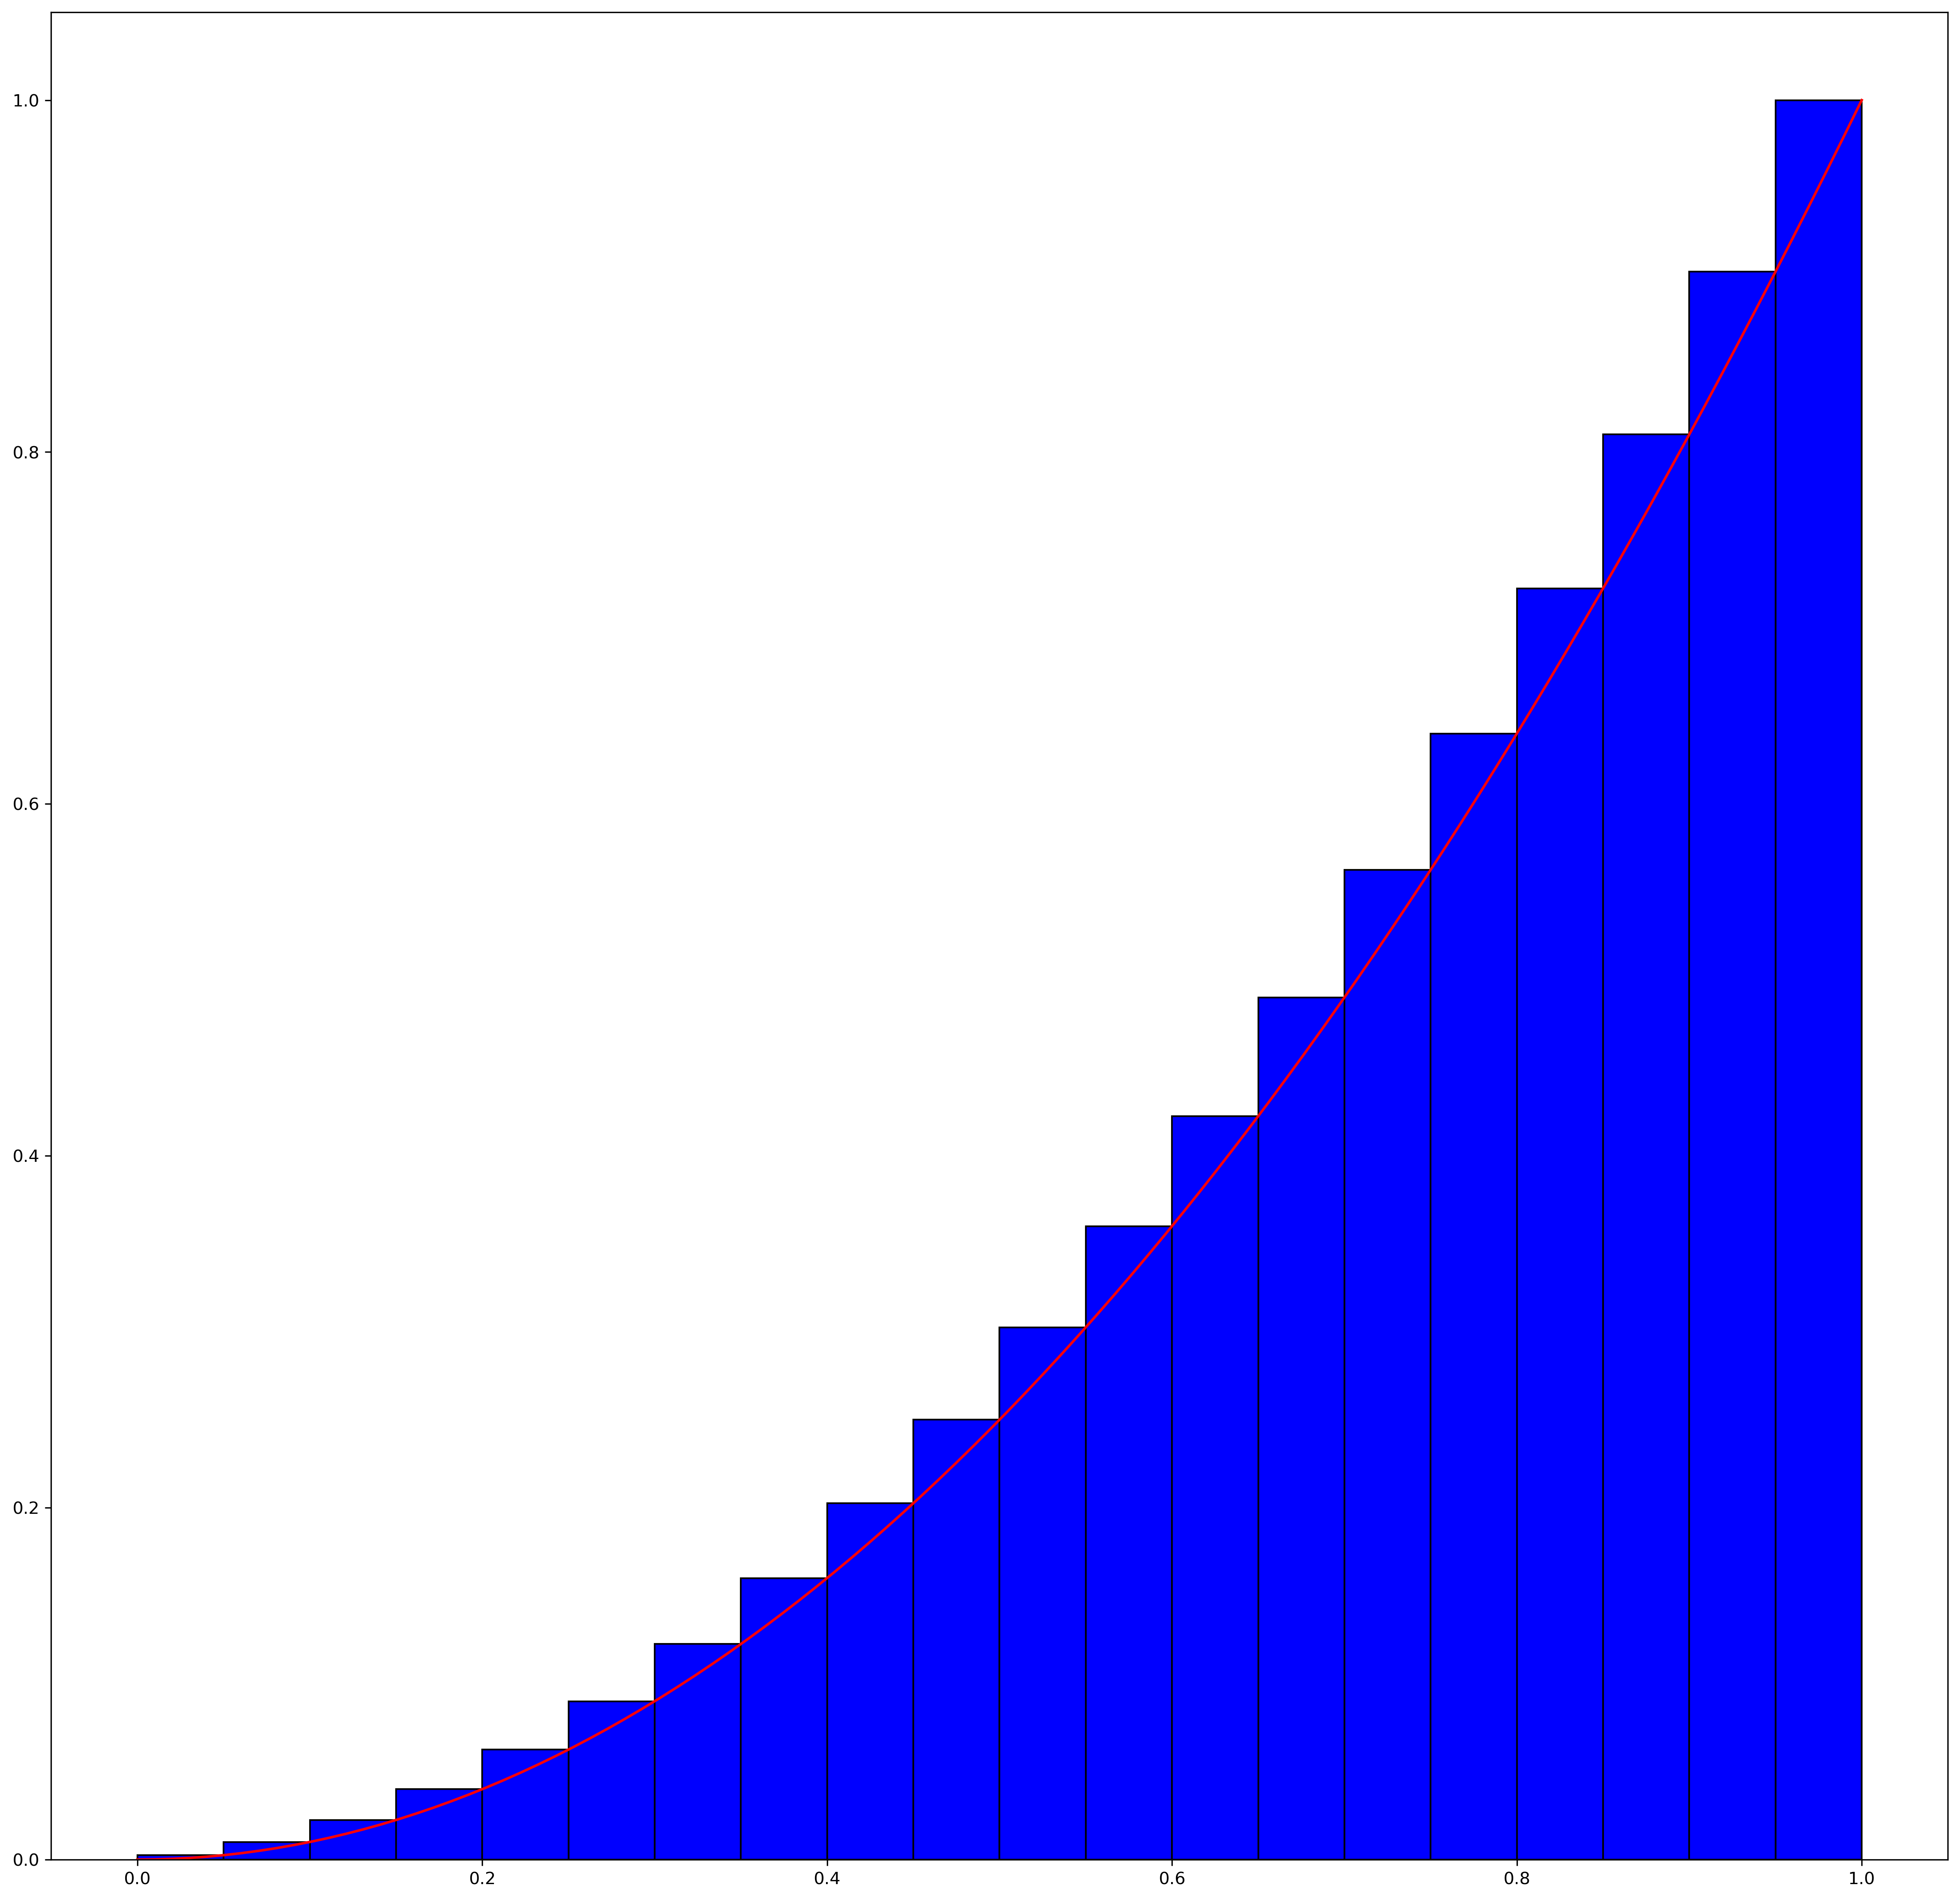

0.35875000000000007

In [7]:
t1 = lambda x: x*x
Rectangle(t1,align='left',plot=True)

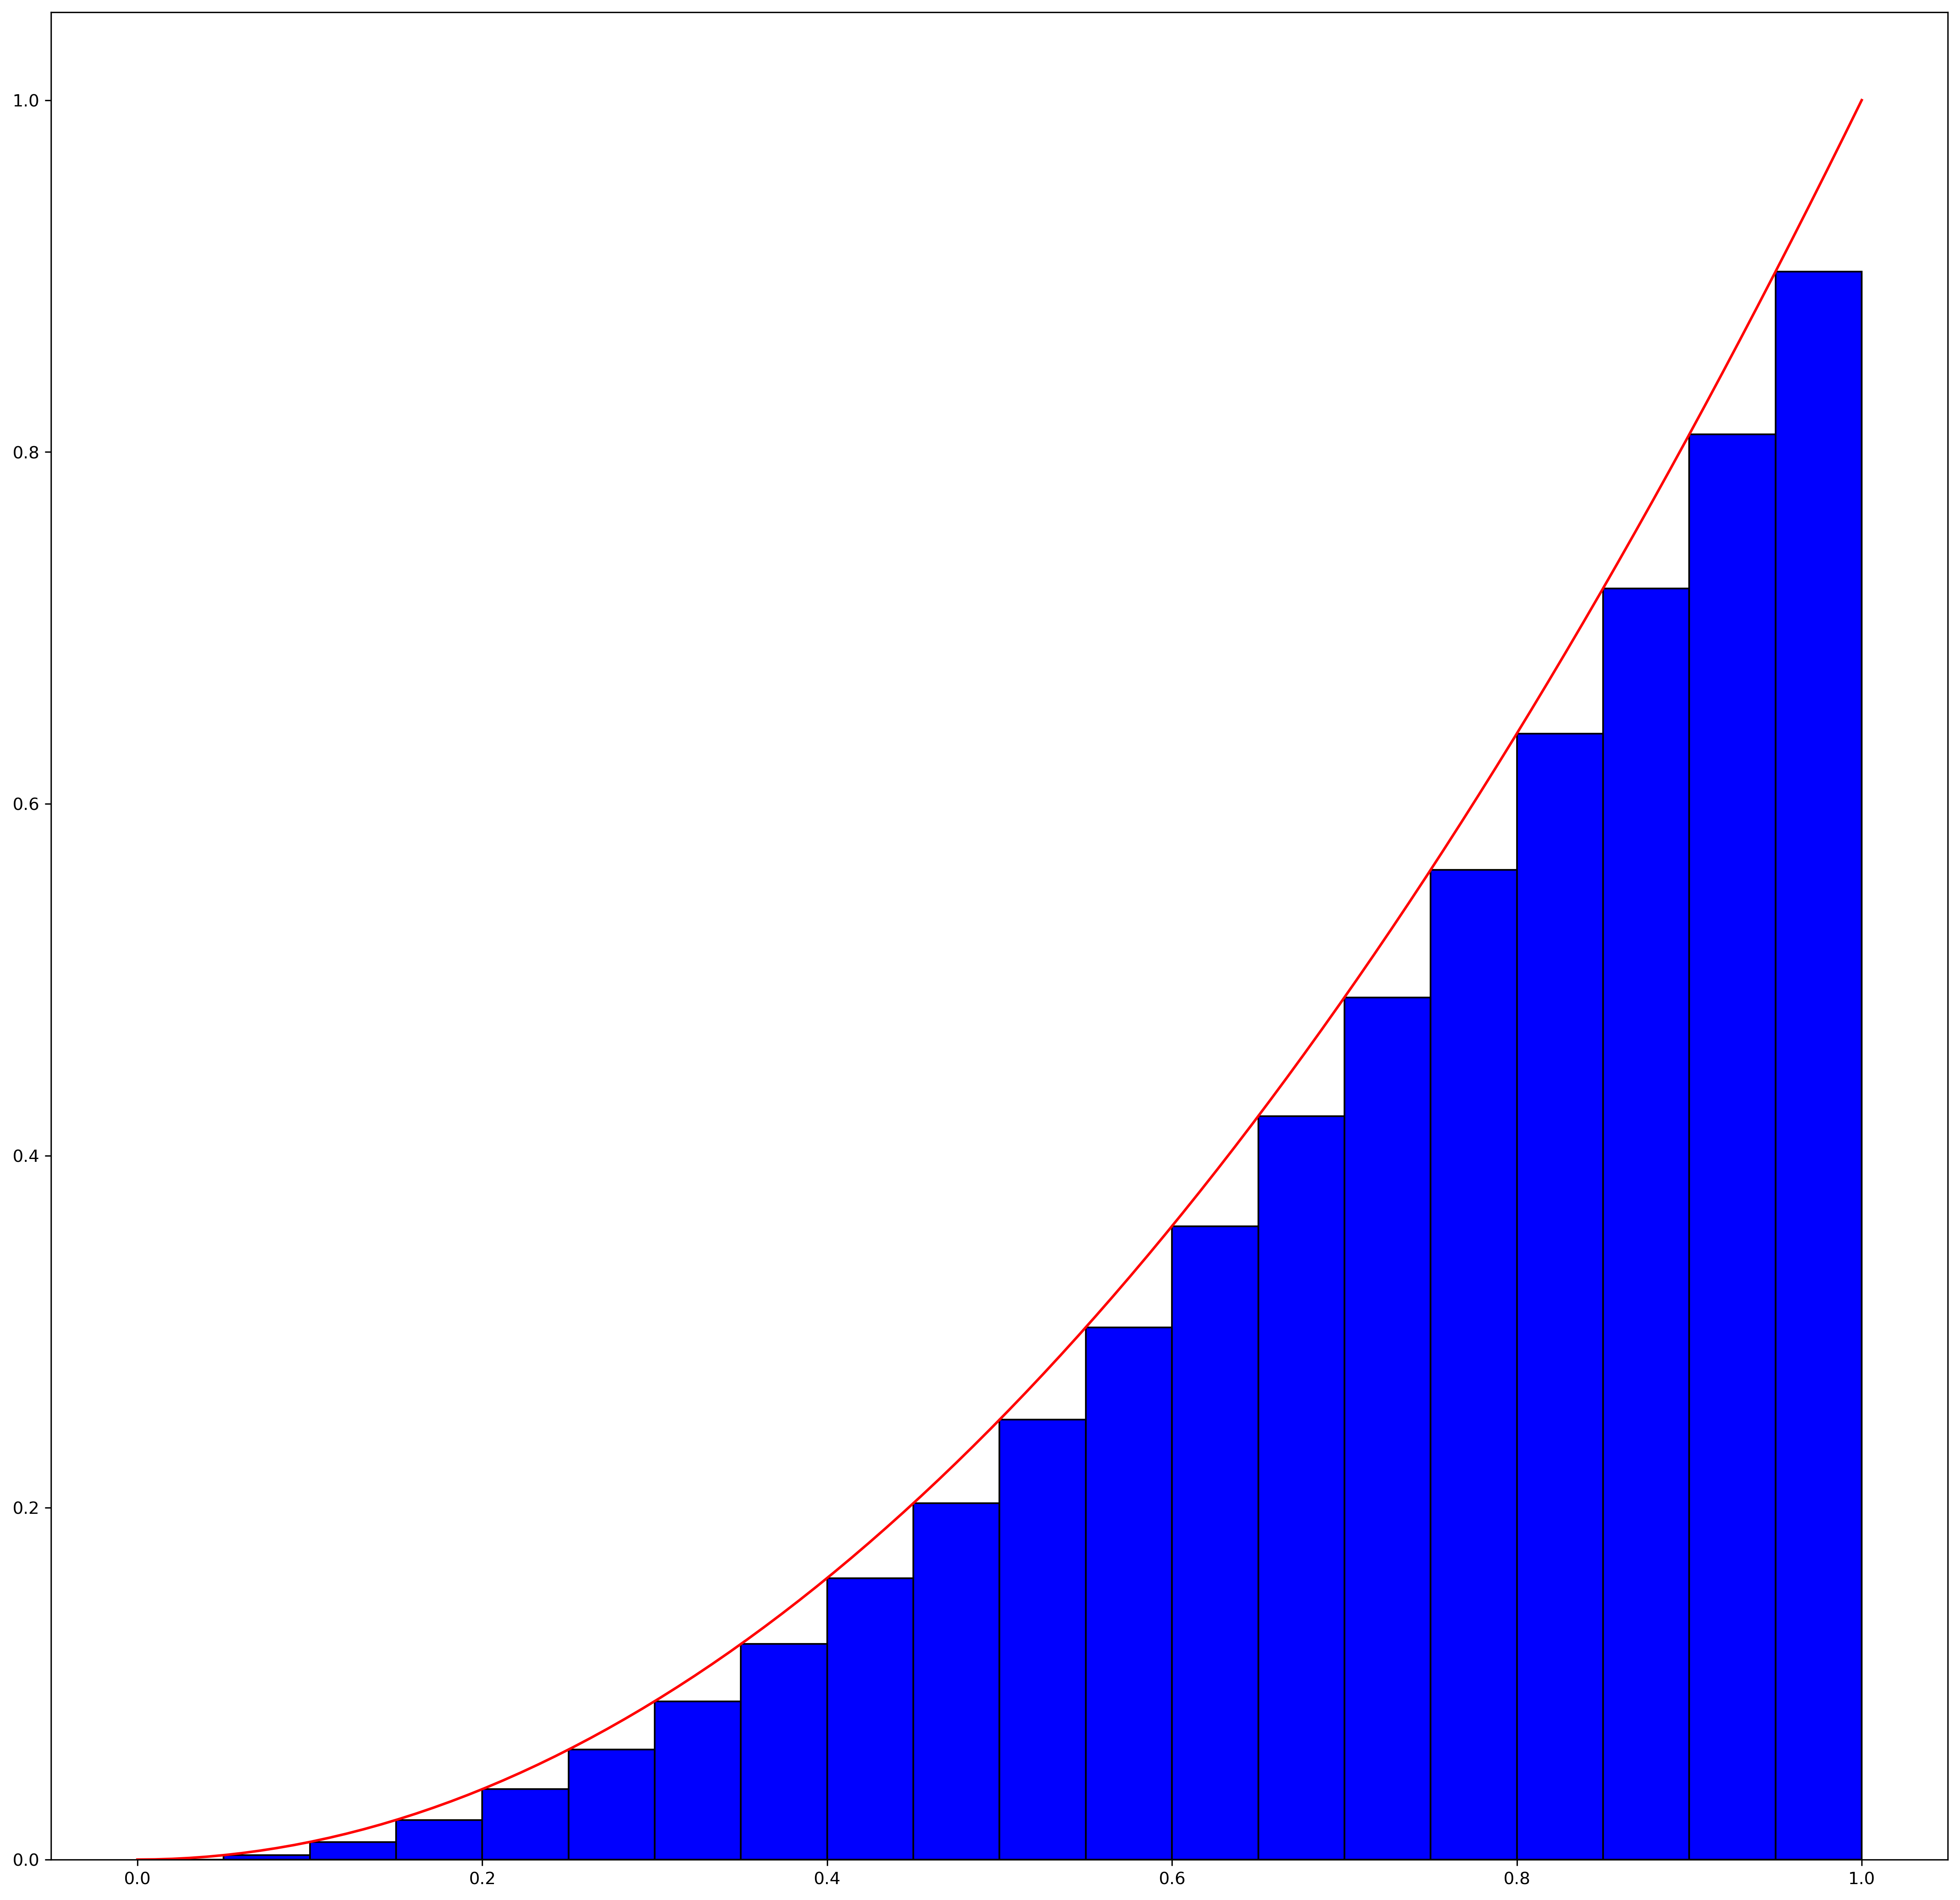

0.3087500000000001

In [8]:
Rectangle(t1,align='right',plot=True)

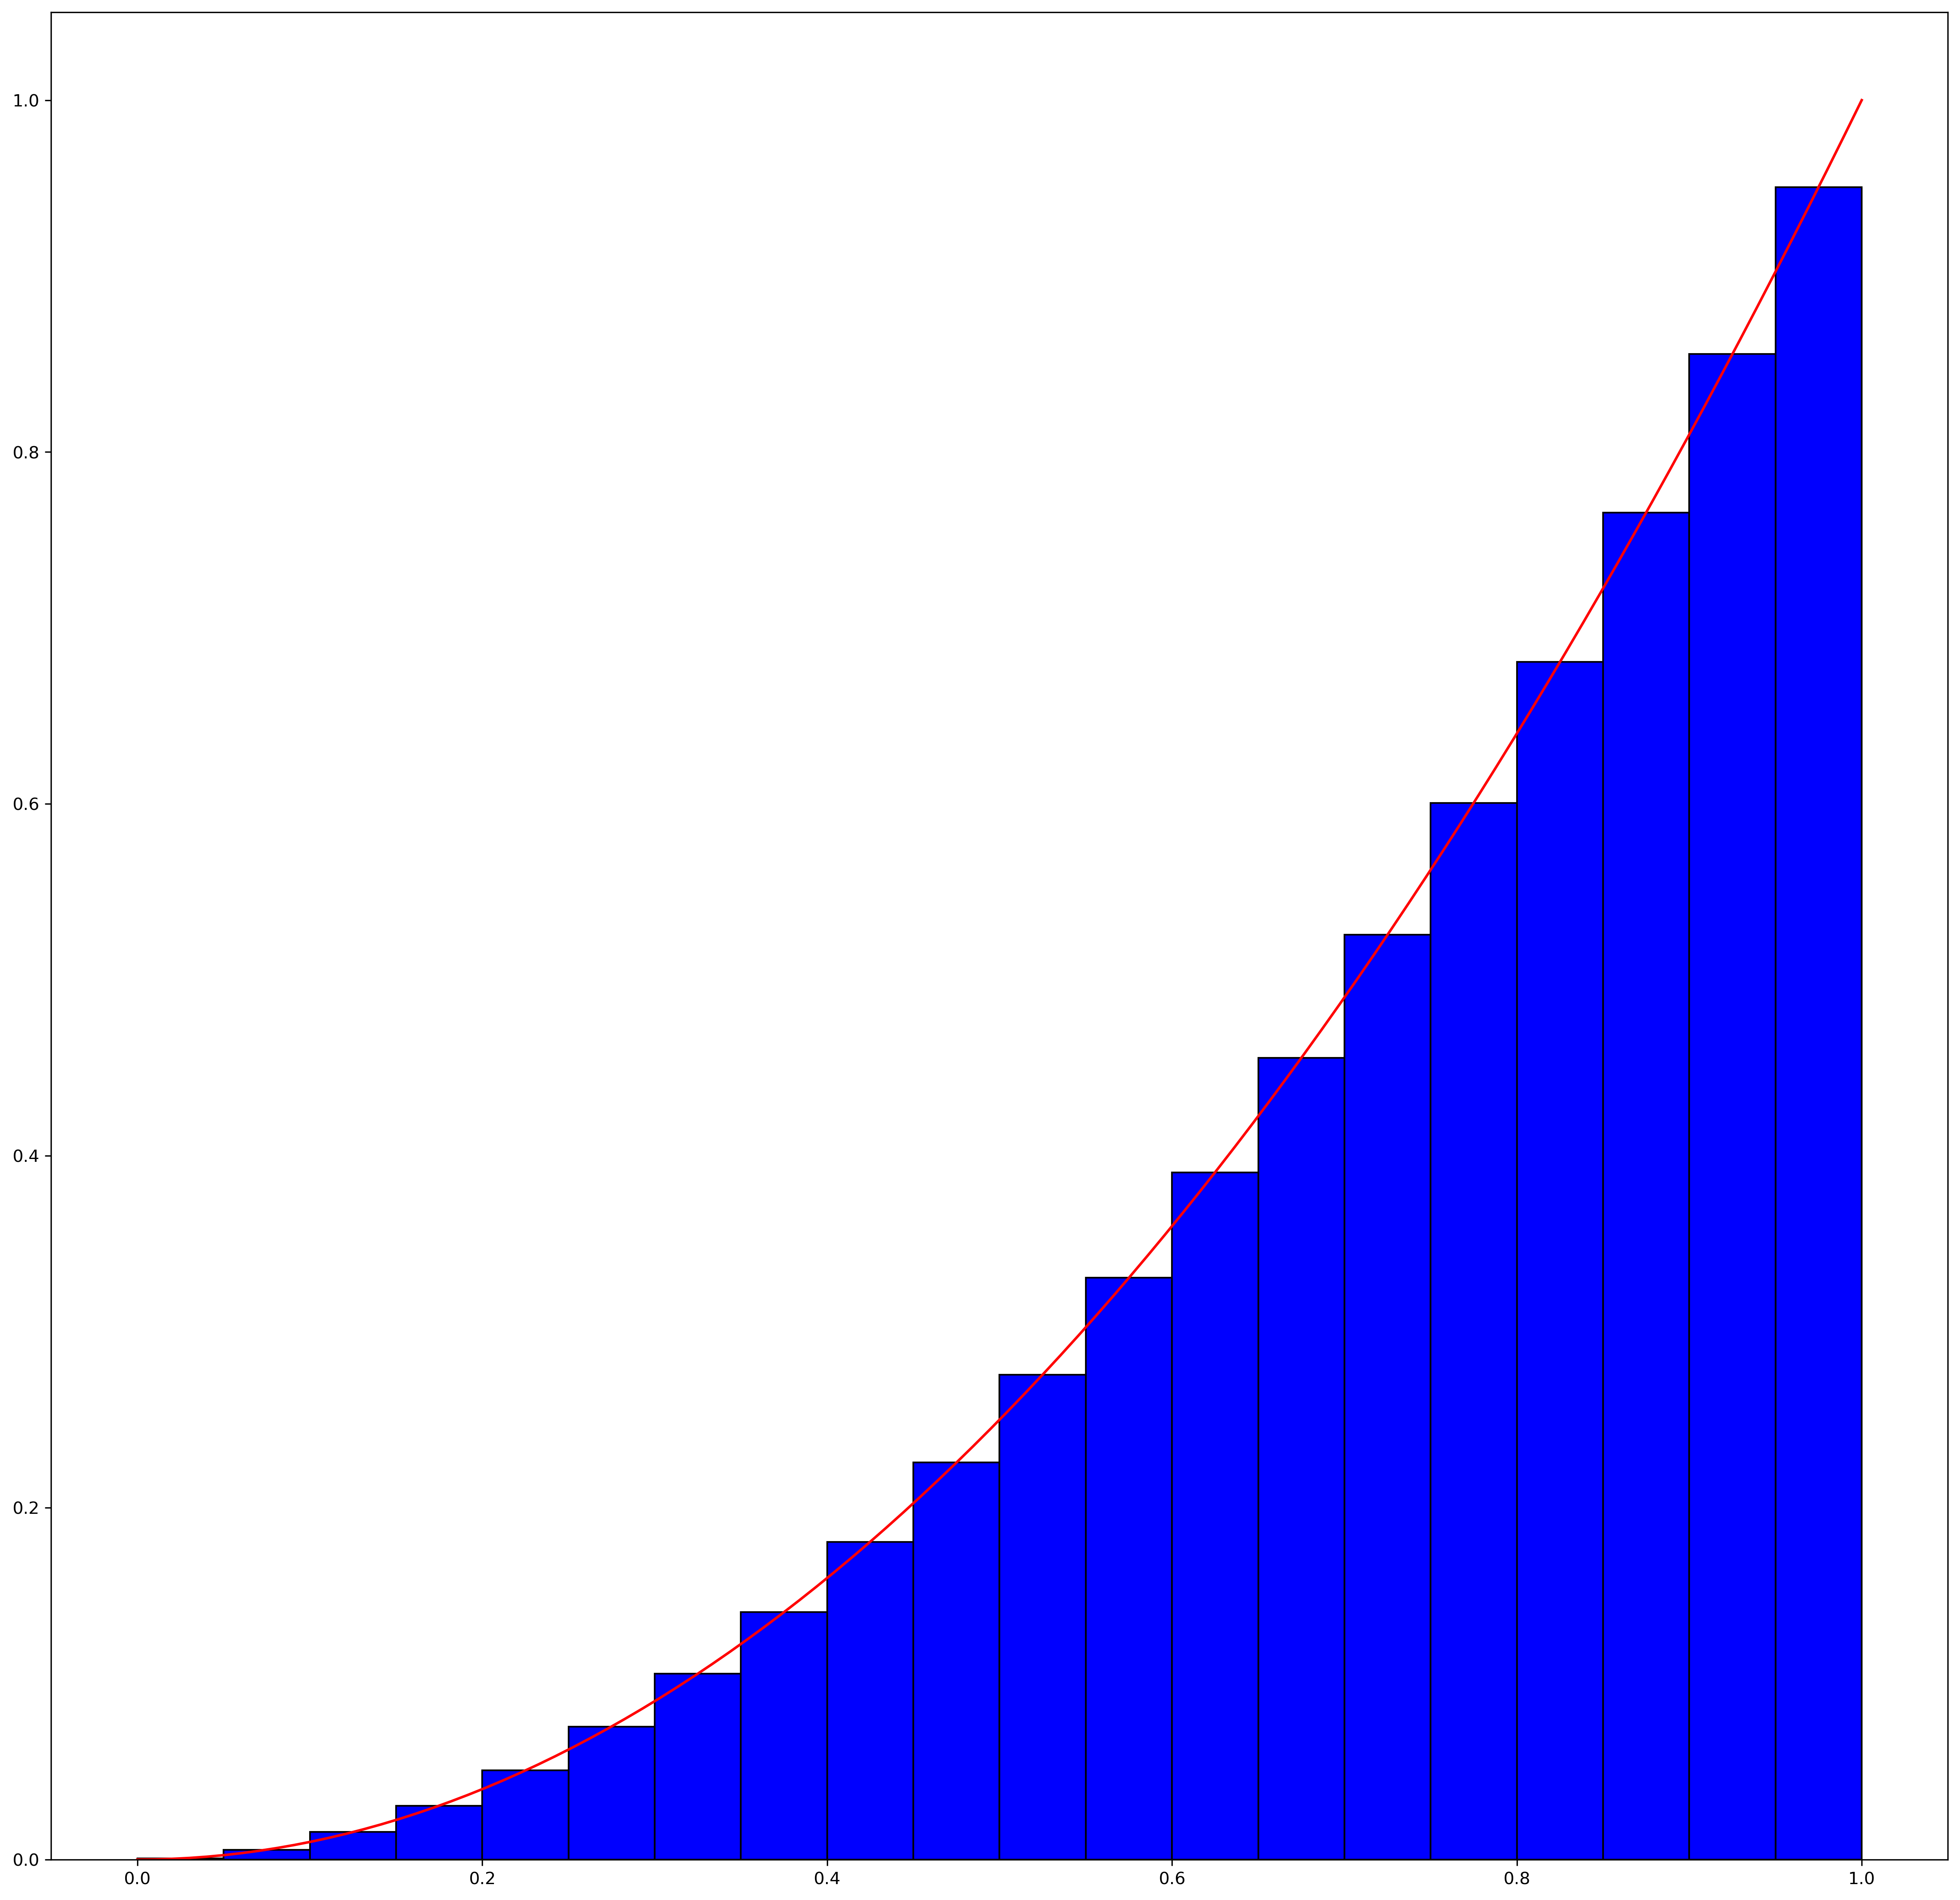

0.3331250000000001

In [9]:
Rectangle(t1,plot=True)

In [10]:
t2 = lambda x: x**3+x-3

In [11]:
Rectangle(t2,divs=10000)

-2.2500000012500116

In [12]:
t3 = lambda x: x*x

Trapezoid(t3,divs=1000)

0.3333335

In [13]:
t4 = lambda x: x**3+3*x**2-4*x-1

Simpsons(t4,-1,2,n=100)

3.7499999999999996